## Introduction

> **Dataset**: 
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

> **The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).**

## Table of Contents
<ul>
<li><a href="#intro">Introduction of data and data type</a></li>
<li><a href="#processing">Data pre-processing</a></li>
<li><a href="#DT">Decision Tree</a></li>
</ul>

In [1]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

## Load data

In [2]:
#load data and seperate it with ; to make each object to its entity
df = pd.read_csv('bank-additional-full.csv',sep=';')
pd.set_option('max_columns', None)
#print first 5 rows in data
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# get all the info for data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

#### Now we can notice that the data contain 11 features of type object and 5 features of type integer and 5 features of type float

In [4]:
# Return unique categories in each coloum
df.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [5]:
#Return statistics information of numeric features 
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


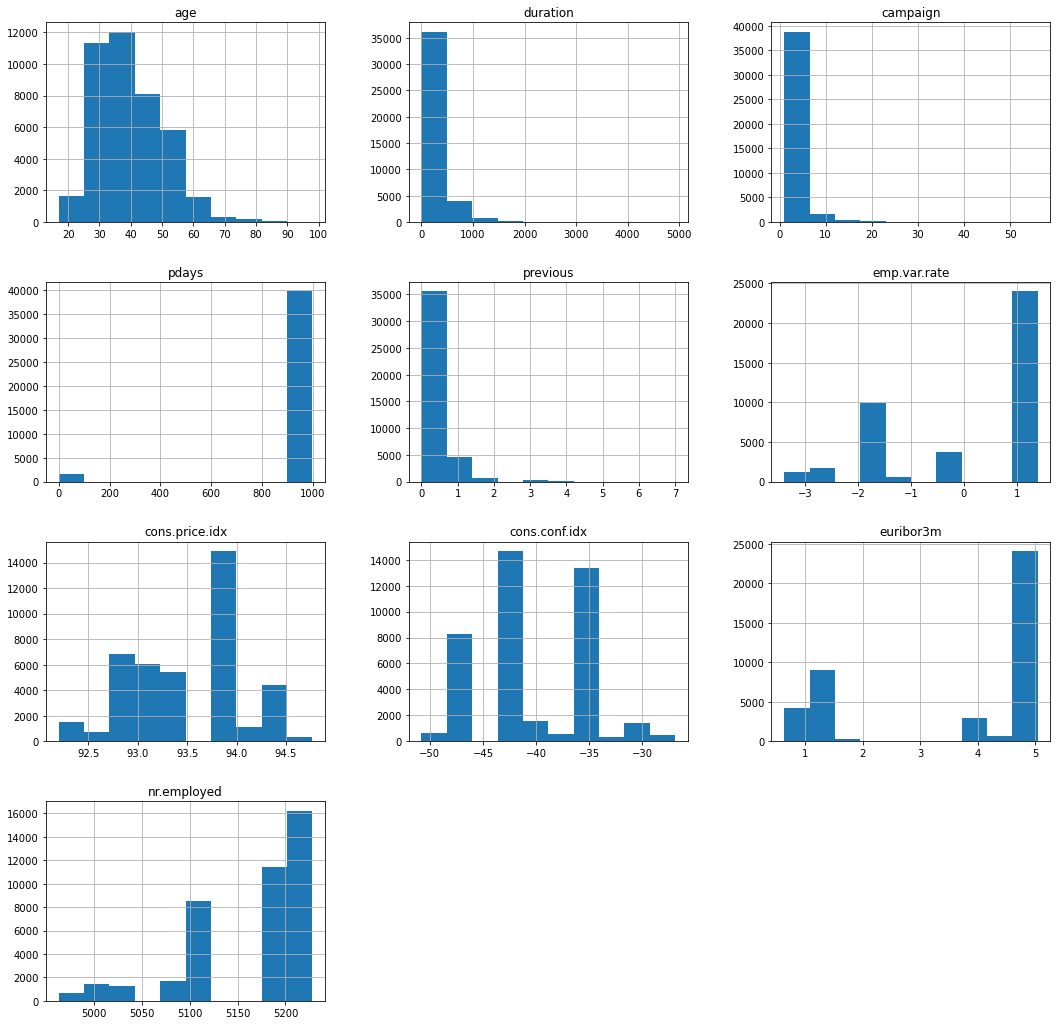

In [6]:
# Visualize each feature by histogram 
df.hist(figsize=(18,18));

In [7]:
#retuen the count of yes , no values
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

# Cleaning data

>**Dealing with duplication data**

In [8]:
# return the number of duplicated row 
df.duplicated().sum()

12

In [9]:
# removing duplicates 
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

#### Now there is no duplicated 

## Methods to deal with our data

>**A Function that gives a list containing the names of the categorical columns**


In [11]:
#This function take the data and return a list containing categorical columns
def get_cat (dataf):
    #empty list to store in it the features
    l_cat_attr=[]
    #for loop to check each type of data
    for i,j in zip(dataf.dtypes,df.columns):
        if i =='object':
            #append the categorical feature into the list
            l_cat_attr.append(j)
    #finall return the categorical features
    return l_cat_attr

l_cat_attr=get_cat(df)

### Transformation 

> **We need to convert categorica to numerical**
>
> **to convert each column one by one to avoid errors coming from fit_tarnsform method so we need this function** 


In [12]:
#we assign variable by OrdinalEncoder object
ordinal_enco=OrdinalEncoder()
#we need empty list to store in it the coloumns after converting them
np_l=[]
np_indicator=[]
#for loop to transform each category type to numeric type
for i in l_cat_attr:
    jj_dataframe=df[['{}'.format(i)]]
    np_cat=ordinal_enco.fit_transform(jj_dataframe)
    np_l.append(np_cat)
    np_indicator.append(ordinal_enco.categories_ )
#finally we have a list contating converted features
indicte=[x for x in zip(l_cat_attr,np_indicator)]    

>**A Function that get index of unknown value or nonexistent values  in indicte list**


In [13]:
def indexOfUnknown(col):
    w1 = 'unknown'
    w2 = 'nonexistent'
    ind = indicte
    for i in ind:
        if i[0]==col:
            c= 0
            for x in i[1][0]:
                if x==w1 or x==w2:
                    return c
                else:
                    c+=1

In [14]:
#Return the index number of unknown values in each feature
for i in l_cat_attr:
    print(i,': ',indexOfUnknown(i))

job :  11
marital :  3
education :  7
default :  1
housing :  1
loan :  1
contact :  None
month :  None
day_of_week :  None
poutcome :  1
y :  None


### Transforming categorical attributes to numerical ones.

In [15]:
cat_pipeline = ColumnTransformer([("cat",OrdinalEncoder(),l_cat_attr),])
np_prepared_cat = cat_pipeline.fit_transform(df)
np_prepared_cat.shape

(41176, 11)

<li> df_catt: is a dataframe that has the transformed categorical attributes.</li>
<li>df_num: is a dataframe that has the original numerical attributes.</li>

In [16]:
df_catt=pd.DataFrame(np_prepared_cat,columns=l_cat_attr)
df_num=df.drop(columns=l_cat_attr)
np_all=np.c_[df_num,df_catt]
df_all=pd.DataFrame(np_all,columns=list(df_num.columns)+l_cat_attr)
df_all.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,56.0,261.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,1.0,0.0
1,57.0,149.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,7.0,1.0,3.0,1.0,0.0,0.0,1.0,6.0,1.0,1.0,0.0
2,37.0,226.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,7.0,1.0,3.0,0.0,2.0,0.0,1.0,6.0,1.0,1.0,0.0
3,40.0,151.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,6.0,1.0,1.0,0.0
4,56.0,307.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,7.0,1.0,3.0,0.0,0.0,2.0,1.0,6.0,1.0,1.0,0.0


#### We can notice that all the data have become numerical 

### Correlation between attributes

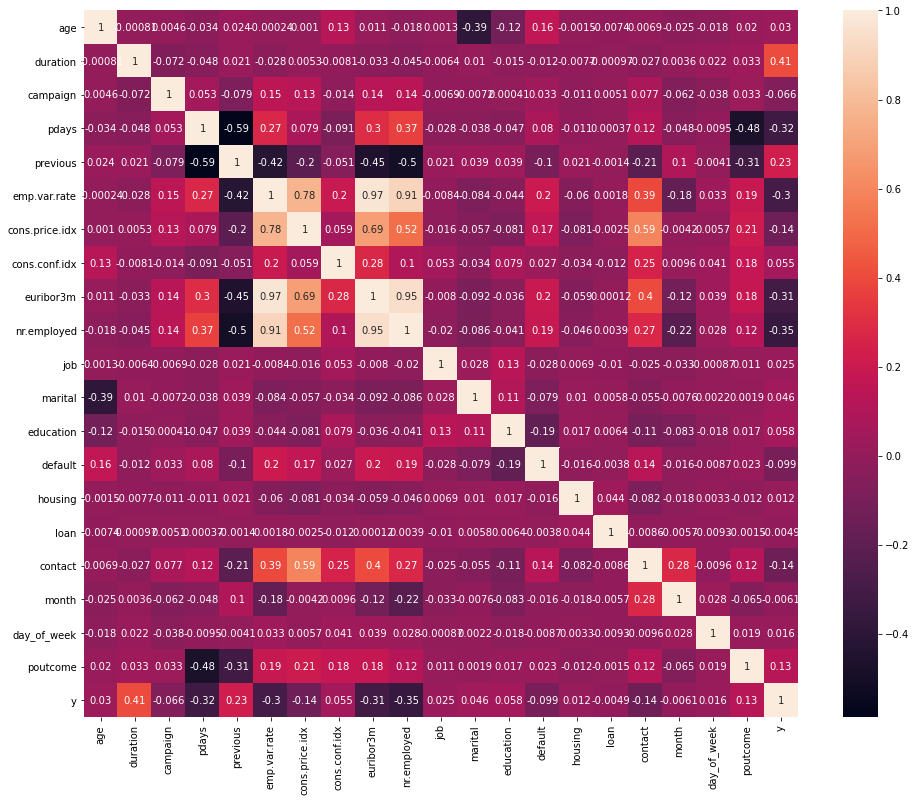

In [17]:
#Visualize the correlation matrix of the all attributes
plt.figure(figsize=(16, 13))
sns.heatmap(df_all.corr(), annot=True)
plt.show()



###  We notice that the three attributes **["emp.var.rate", "nr.employed", "euribor3m"]** are highly correlated so we plot them to determine which two of the three will be removed according to the highest correlation value

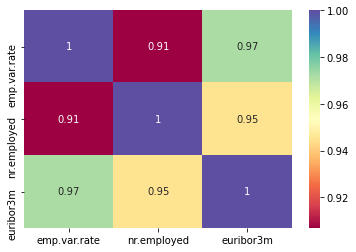

In [18]:
sns.heatmap(df_all[["emp.var.rate", "nr.employed", "euribor3m"]].corr(), annot=True, cmap='Spectral')
plt.show()

### so we will drop ['euribor3m','emp.var.rate']

In [19]:
df_all.drop(columns = ['euribor3m','emp.var.rate'],inplace = True)

## Spliting the dataset

In [20]:
x = df_all.drop(columns=['y'])
y = df_all[['y']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [21]:
# containg all of the feature except the label 
x_train.shape

(32940, 18)

In [22]:
# containg the label data only
y_train.shape

(32940, 1)

In [23]:
#Containg the test data which on it we will test the model
x_test.shape,y_test.shape

((8236, 18), (8236, 1))

In [24]:
train_all = x_train
train_all['y'] = y_train

## Dealing with unknown values 

>**Replacing the unknown values with a random value from the same attribute in the columns ['job', 'marital'] since their count was too low to cause any significant change**

>**The reason for not doing the same with ['education'] as we did with the previous two columns is that the number of records is relatively large compared to the other two. If they were to be randomized they would cause a noticable change in the ratio between the other records' counts.**

In [25]:
# return the count of repeated values
# remember 11 refear to unknown values
train_all['job'].value_counts()

0.0     8313
1.0     7455
9.0     5403
7.0     3187
4.0     2363
5.0     1375
2.0     1134
6.0     1095
3.0      868
10.0     789
8.0      683
11.0     275
Name: job, dtype: int64

In [26]:
train_all['job'].replace((indexOfUnknown('job')),np.random.randint(0,indexOfUnknown('job')),inplace=True)

In [27]:
# return the count of repeated values
# remember 3 refear to unknown values
train_all['marital'].value_counts()

1.0    19906
2.0     9258
0.0     3711
3.0       65
Name: marital, dtype: int64

In [28]:
train_all['marital'].replace((indexOfUnknown('marital')),np.random.randint(0,indexOfUnknown('marital')),inplace=True)

In [29]:
# return the count of repeated values
# remember 7 refear to unknown values
train_all['education'].value_counts()

6.0    9689
3.0    7609
2.0    4838
5.0    4198
0.0    3358
1.0    1842
7.0    1392
4.0      14
Name: education, dtype: int64

In [30]:
train_all.drop(train_all.loc[train_all['education']==indexOfUnknown('education')].index, axis = 0 ,inplace = True)

## Drop 'default' coloumn cause it has only 3 values 'yes', 'no' and 'unknown', so if we replace unknown all values will be no because their is only 3 yes.

In [31]:
train_all['default'].value_counts()

0.0    25161
1.0     6384
2.0        3
Name: default, dtype: int64

In [32]:
# removing this coloumn
train_all.drop(columns=['default'],inplace=True)

## Dealing with irrelevent attributes

In [33]:
## removing irrelevent attributes
train_all.drop(columns=['pdays','contact'],inplace=True)

>**Drop poutcome cause have more than 71% observation unknowns**

In [34]:
train_all['poutcome'].value_counts()

1.0    27291
0.0     3224
2.0     1033
Name: poutcome, dtype: int64

In [35]:
train_all.drop(columns=['poutcome'],inplace=True)

### Check ['housing'] , ['loan'] values

In [36]:
train_all['housing'].value_counts()

2.0    16612
0.0    14179
1.0      757
Name: housing, dtype: int64

In [37]:
train_all['loan'].value_counts()

0.0    25941
2.0     4850
1.0      757
Name: loan, dtype: int64

### Using crosstab to check if the unknown values in the columns **['loan', 'housing']** are in the same records.

In [38]:
pd.crosstab(train_all['housing'],train_all['loan'])

loan,0.0,1.0,2.0
housing,,,
0.0,12188,0,1991
1.0,0,757,0
2.0,13753,0,2859


### Drop housing and loan null values because:

> <li>1.both have same unknwons values</li>
> <li>2.it is boolean so it is sensitive for any error</li>

In [39]:
#When we drop them from 'housing' directly they will be dropped in 'loan' too
train_all.drop(train_all.loc[train_all['housing']==indexOfUnknown('housing')].index, axis = 0 ,inplace = True)

## Scale data

In [40]:
# divided the duration to be in  minutes instead of seconds
train_all['duration']=train_all['duration'].apply(lambda x:x/60 )

### let's see what happend after randmization


In [41]:
# check the attributes after removing the previous features
removed_attri=['pdays','contact','default','poutcome']
l_cat_attr

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [42]:
# what we have now in our data 
new_l_cat_attr=['job','marital','education','housing','loan','month','day_of_week','y']

## Check the unknown values after we dealt with them

In [43]:
for i in new_l_cat_attr :
    print(i,': ',train_all[train_all[i] == indexOfUnknown(i)].shape[0])

job :  0
marital :  0
education :  0
housing :  0
loan :  0
month :  0
day_of_week :  0
y :  0


### Finally there is no unknown values

## Checking the unique categories after cleaning data

In [44]:
train_all.nunique()

age                 77
duration          1440
campaign            40
previous             8
cons.price.idx      26
cons.conf.idx       26
nr.employed         11
job                 11
marital              3
education            7
housing              2
loan                 2
month               10
day_of_week          5
y                    2
dtype: int64

## Applying Discretization

>**AGE**

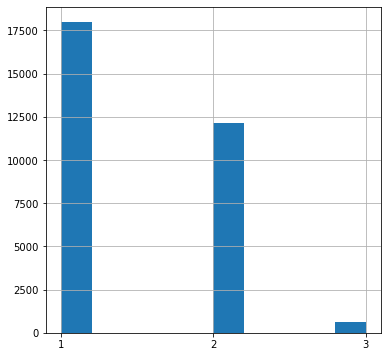

In [45]:
# Make it in 3 bins
train_all['age']=pd.cut(train_all['age'],bins=[18,40,60,np.inf],labels=['1','2','3'])
train_all['age'].hist(figsize=(6,6));

In [46]:
#train_all['age'].hist(figsize=(6,6));

In [47]:
#check null values
train_all.isnull().sum()

age               15
duration           0
campaign           0
previous           0
cons.price.idx     0
cons.conf.idx      0
nr.employed        0
job                0
marital            0
education          0
housing            0
loan               0
month              0
day_of_week        0
y                  0
dtype: int64

>**DURATION**

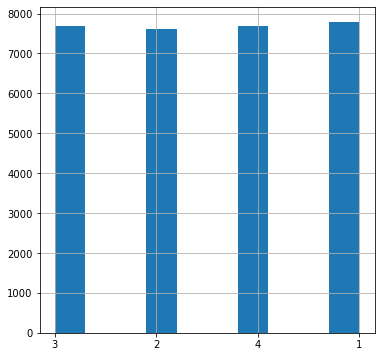

In [48]:
#Make them in 4 bins
train_all['duration']=pd.qcut(train_all['duration'],q=4,labels=list('1234'))
train_all['duration'].hist(figsize=(6,6));

In [49]:
train_all['duration'].value_counts()

1    7785
3    7696
4    7692
2    7618
Name: duration, dtype: int64

>**NR.EMPLOYED**

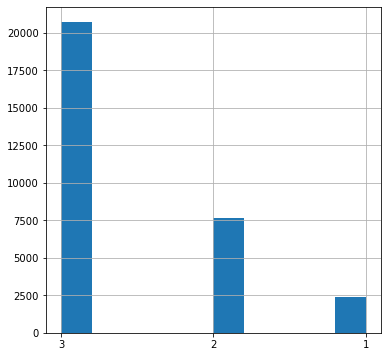

In [50]:
train_all['nr.employed']=pd.cut(train_all['nr.employed'],bins=3,labels=['1','2','3'])
train_all['nr.employed'].hist(figsize=(6,6));

>**CAMPAIGN**

In [51]:
train_all['campaign'].value_counts()

1.0     13141
2.0      7916
3.0      3975
4.0      1993
5.0      1213
6.0       751
7.0       468
8.0       300
9.0       220
10.0      160
11.0      133
12.0       94
13.0       63
14.0       51
17.0       44
15.0       41
16.0       38
18.0       28
20.0       23
19.0       19
22.0       14
24.0       14
21.0       14
23.0       12
29.0        8
28.0        8
30.0        7
26.0        7
27.0        6
31.0        5
25.0        5
35.0        4
33.0        4
34.0        2
32.0        2
40.0        2
43.0        2
42.0        2
37.0        1
39.0        1
Name: campaign, dtype: int64

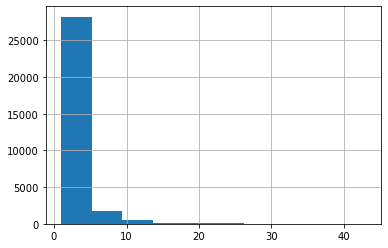

In [52]:
train_all['campaign'].hist();

In [53]:
#Make it in 8 bins
train_all['campaign']=pd.cut(train_all['campaign'],bins=8,labels=list('12345678') )


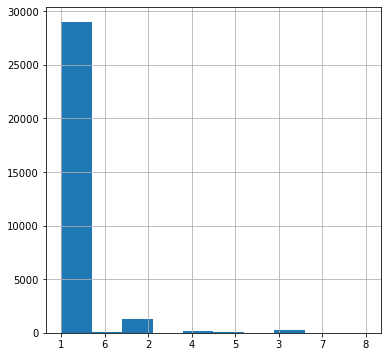

In [54]:
train_all['campaign'].hist(figsize=(6,6));

>**PREVIOUS**

In [55]:
train_all['previous'].value_counts()

0.0    26640
1.0     3378
2.0      556
3.0      153
4.0       49
5.0       10
6.0        4
7.0        1
Name: previous, dtype: int64

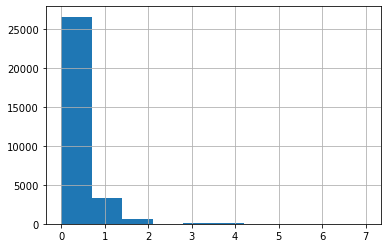

In [56]:
#Not making on it anything
train_all['previous'].hist();

>**Month**

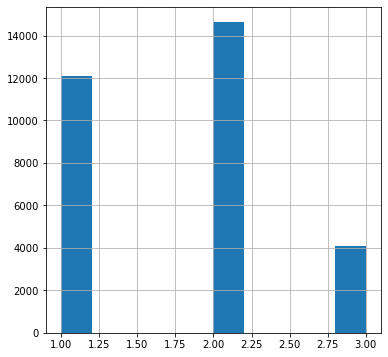

In [57]:
#Make it in 3 bins
train_all['month']=pd.cut(train_all['month'],bins=3,labels=[1,2,3]) 
train_all['month'].hist(figsize=(6,6));

>**CONS.PRICE.IDX**

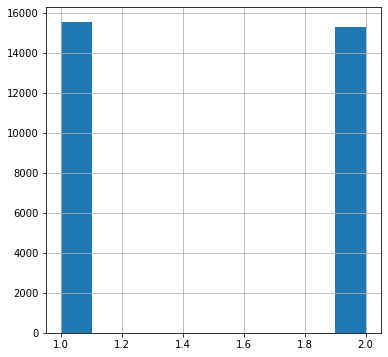

In [58]:
#Make it in 2 bins
train_all['cons.price.idx']=pd.cut(train_all['cons.price.idx'],bins=2,labels=[1,2]) 
train_all['cons.price.idx'].hist(figsize=(6,6));

>**CONS.CONF.IDX**

In [59]:
train_all['cons.conf.idx'].value_counts().sort_index()

-50.8      94
-50.0     226
-49.5     155
-47.1    1816
-46.2    4444
-45.9       9
-42.7    4977
-42.0    2779
-41.8    3257
-40.8     521
-40.4      46
-40.3     226
-40.0     151
-39.8     163
-38.3     168
-37.5     226
-36.4    5682
-36.1    3964
-34.8     184
-34.6     120
-33.6     130
-33.0     124
-31.4     542
-30.1     262
-29.8     190
-26.9     335
Name: cons.conf.idx, dtype: int64

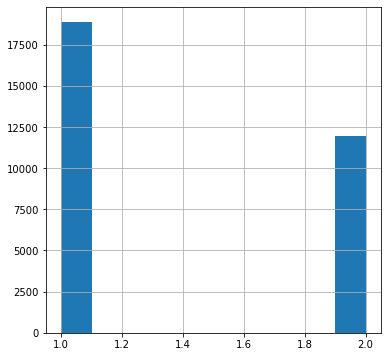

In [60]:
#Make it in 2 bins
train_all['cons.conf.idx']=pd.cut(train_all['cons.conf.idx'],bins=2,labels=[1,2]) 
train_all['cons.conf.idx'].hist(figsize=(6,6));

In [61]:
#train_all.nunique()

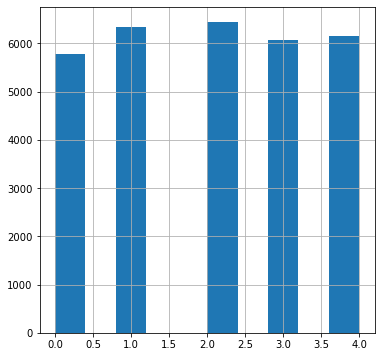

In [62]:
#Not making on it anything
train_all['day_of_week'].hist(figsize=(6,6));

## Check the number of categories after discretization

In [63]:
train_all.nunique()

age                3
duration           4
campaign           8
previous           8
cons.price.idx     2
cons.conf.idx      2
nr.employed        3
job               11
marital            3
education          7
housing            2
loan               2
month              3
day_of_week        5
y                  2
dtype: int64

In [64]:
train_all.dropna(inplace=True)

# Shape the spliting data

In [65]:
#drop all the features to have only labeled data 
y_label_train=train_all.drop(columns=list(train_all.columns)[:-1],axis=1)

In [66]:
train_all.drop('y',axis=1,inplace=True)

In [67]:
train_all.shape

(30776, 14)

In [68]:
## removing irrelevent attributes from test set
x_test.drop(columns=['pdays','contact','default','poutcome'],inplace=True)


In [69]:
#Check the colomns of test data
x_test.columns==train_all.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [70]:
#info about the data
train_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30776 entries, 12346 to 15795
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             30776 non-null  category
 1   duration        30776 non-null  category
 2   campaign        30776 non-null  category
 3   previous        30776 non-null  float64 
 4   cons.price.idx  30776 non-null  category
 5   cons.conf.idx   30776 non-null  category
 6   nr.employed     30776 non-null  category
 7   job             30776 non-null  float64 
 8   marital         30776 non-null  float64 
 9   education       30776 non-null  float64 
 10  housing         30776 non-null  float64 
 11  loan            30776 non-null  float64 
 12  month           30776 non-null  category
 13  day_of_week     30776 non-null  float64 
dtypes: category(7), float64(7)
memory usage: 2.1 MB


In [71]:
#There is no null values
train_all.isnull().sum()

age               0
duration          0
campaign          0
previous          0
cons.price.idx    0
cons.conf.idx     0
nr.employed       0
job               0
marital           0
education         0
housing           0
loan              0
month             0
day_of_week       0
dtype: int64

# Building the Model

In [ ]:
#Decision Tree Model
tree_clf = DecisionTreeClassifier()
tree_clf.fit( train_all, y_label_train)

DecisionTreeClassifier()

## Accuracy of the model

In [ ]:
#predict the label 
y_pred=tree_clf.predict(x_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 70.08256435162701


c:\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


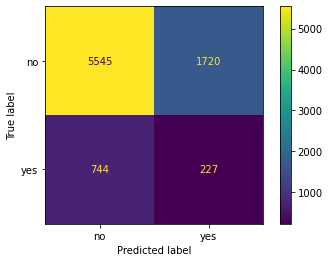

In [ ]:
#Plotting confusion matrix of test data
plot_confusion_matrix(tree_clf,x_test,y_test,display_labels=['no','yes']);

## sample for visualizing

In [ ]:
vis_sample_train_data=train_all.iloc[:100]
vis_sample_train_labels=y_label_train.iloc[:100]
vis_sample_test_data=x_test.iloc[:100]
vis_sample_test_labels=y_test.iloc[:100]

In [ ]:
vis_tree_clf = DecisionTreeClassifier(random_state=42)
vis_tree_clf.fit( vis_sample_train_data, vis_sample_train_labels)

DecisionTreeClassifier(random_state=42)

In [ ]:
vis_y_pred=vis_tree_clf.predict(vis_sample_test_data)

In [ ]:
print("Accuracy:",metrics.accuracy_score(vis_sample_test_labels, vis_y_pred)*100)

Accuracy: 90.0


c:\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


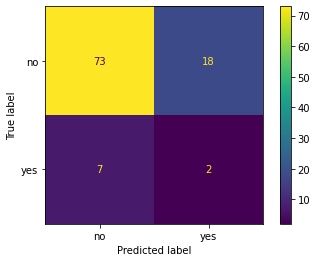

In [ ]:
#Plotting confusion matrix of test data
plot_confusion_matrix(tree_clf,vis_sample_test_data,vis_sample_test_labels,display_labels=['no','yes']);

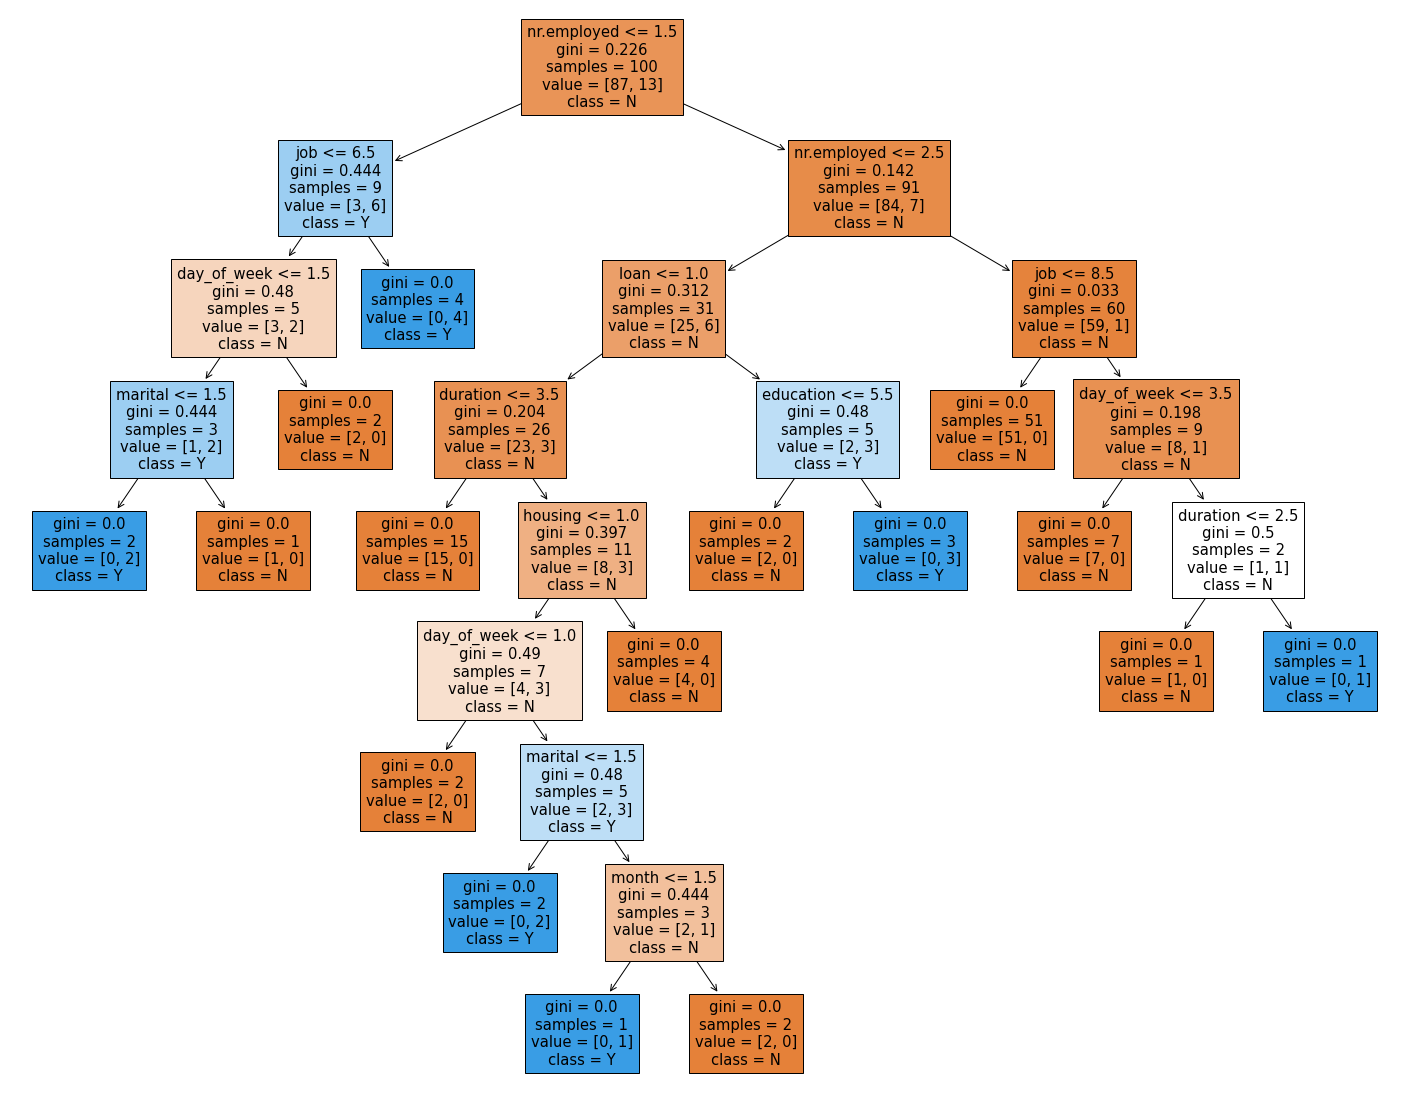

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(vis_tree_clf, 
                   feature_names=vis_sample_train_data.columns,  
                   class_names=['N','Y'],
                   filled=True)

## Tunning the model

# Preparing of cross validation

In [ ]:
path=tree_clf.cost_complexity_pruning_path(train_all,y_label_train)
#determine values for alpha
ccp_alphas =path.ccp_alphas
#extract different values for alpha
ccp_alphas=ccp_alphas[:-1]
#exclude the maximum value for alpha
clf_dts=[]
#create an array that we will put decision trees into
#now create one decision tree per value for alpha and store it in the array
for ccp_alpha in ccp_alphas:
    clf_dt=DecisionTreeClassifier( random_state=0, ccp_alpha=ccp_alpha)
    clf_dt.fit(train_all,y_label_train)
    clf_dts.append(clf_dt)
                                  

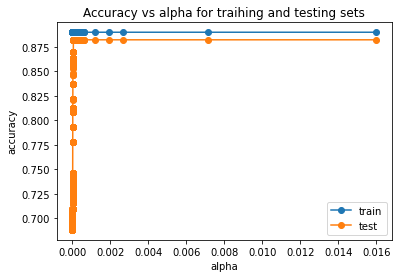

In [ ]:
train_scores =[clf_dt.score(train_all,y_label_train) for clt_dt in clf_dts]
test_scores =[clf_dt.score(x_test, y_test) for clf_dt in clf_dts]
fig, ax =plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for traihing and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

<AxesSubplot:xlabel='tree'>

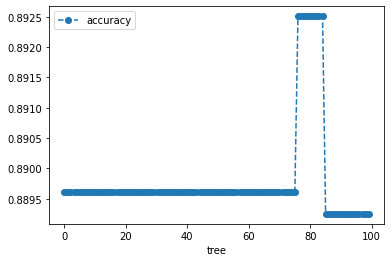

In [ ]:
clf_dt=DecisionTreeClassifier(random_state=42, ccp_alpha=0.016)#create the tree with ccp_alpha-0.016
# now use 100-fold cross validation create5different training and testing datasets that
 #are then used to train and test the tree.
  #NOTE: We use 100-fold because we don't have tons of data...
scores=cross_val_score(clf_dt,train_all,y_label_train, cv=100)
df=pd.DataFrame(data={'tree': range(100), "accuracy": scores})
df.plot(x='tree', y='accuracy', marker='o', linestyle="--")

<AxesSubplot:xlabel='alpha'>

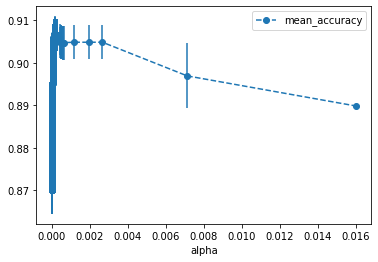

In [ ]:
#create an array to store the results of each fold during cross validiation
alpha_loop_values=[]
#For each candidate value for alpha, we will run 10-fold cross validation.
#Then we will store the nean and standard deviation of the scores (the accuracy) for each call
#to cross_val_score in alpha_toop_values...
for ccp_alpha in ccp_alphas:
    clf_dt=DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores=cross_val_score(clf_dt,train_all, y_label_train, cv=10)
    alpha_loop_values.append( [ccp_alpha, np.mean(scores), np.std(scores)])
#Now we can drawagraph of the means and standard deviations of the scores
#ufor each candidate value for alpha
alpha_results= pd.DataFrame(alpha_loop_values, columns=['alpha', 'mean_accuracy', 'std'])
alpha_results.plot(x='alpha',
               y='mean_accuracy',
                yerr='std',
                marker='o',
                linestyle='--')

In [ ]:
alpha_results[(alpha_results[ 'alpha']> 0.00001) &
              (alpha_results ['alpha']<0.016)]
#Now let's store the ideal value for alpha so that we can use it to build the best tree.

,alpha,mean_accuracy,std
425,0.000010,0.870191,0.004888
426,0.000010,0.870223,0.004884
427,0.000010,0.870256,0.004881
428,0.000010,0.870256,0.004881
429,0.000010,0.870256,0.004881
...,...,...,...
1703,0.000641,0.904731,0.004006
1704,0.001192,0.904828,0.004042
1705,0.001947,0.904828,0.004042
1706,0.002670,0.904828,0.004042


Getting the best alpha value

In [ ]:
alpha_results.max()

alpha            0.016007
mean_accuracy    0.906875
std              0.007629
dtype: float64

In [ ]:
#ideal_ccp_alpha=alpha_results[(alpha_results[ 'alpha']> 0.014) & (alpha_results ['alpha']<0.015)]['alpha']
ideal_ccp_alpha=0.016007

In [ ]:
#convert ideal ccp_alphatromaseries toafloat
ideal_ccp_alpha=float(ideal_ccp_alpha)
ideal_ccp_alpha

0.016007

In [ ]:
#*Build and trainanew decision tree, only this time use the optiaal value for alpha
clf_dt_pruned=DecisionTreeClassifier(random_state=42, ccp_alpha=ideal_ccp_alpha)
clf_dt_pruned=clf_dt_pruned.fit(train_all, y_label_train)

In [ ]:
y_pred=clf_dt_pruned.predict(x_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)


Accuracy: 88.21029626032055


c:\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


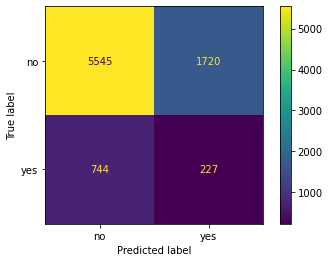

In [ ]:
plot_confusion_matrix(tree_clf,
                      x_test,
                      y_test,
                      display_labels=['no','yes']);

## Visualizing sample after Tuning

In [ ]:
clf_dt_pruned=DecisionTreeClassifier(random_state=42, ccp_alpha=0.016007)
clf_dt_pruned=clf_dt_pruned.fit(vis_sample_train_data, vis_sample_train_labels)

In [ ]:
vis_y_pred=clf_dt_pruned.predict(vis_sample_test_data)

In [ ]:
print("Accuracy:",metrics.accuracy_score(vis_sample_test_labels, vis_y_pred)*100)

Accuracy: 91.0


c:\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


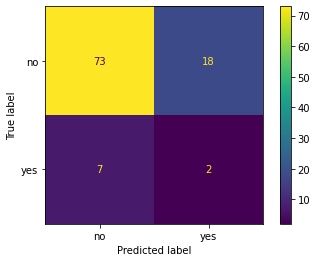

In [ ]:
#Plotting confusion matrix of test data
plot_confusion_matrix(tree_clf,vis_sample_test_data,vis_sample_test_labels,display_labels=['no','yes']);

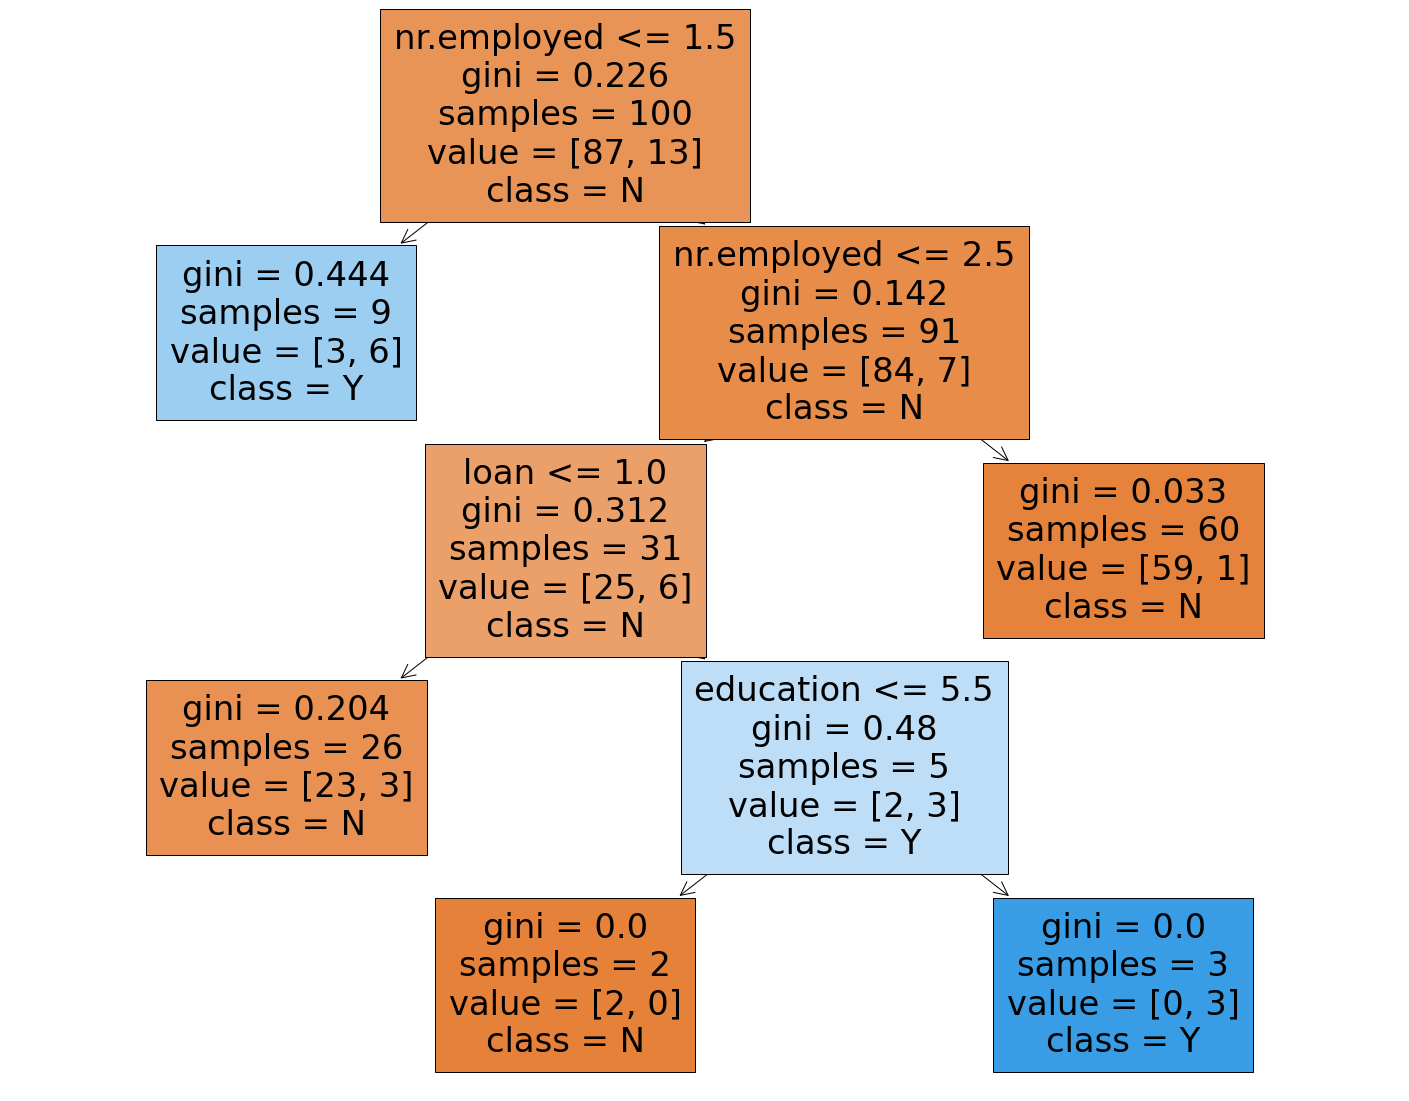

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf_dt_pruned, 
                   feature_names=vis_sample_train_data.columns,  
                   class_names=['N','Y'],
                   filled=True)